In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('survey lung cancer.csv')

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Data Wrangling for Clean and Desired Data Format

In [4]:
Raw_data = data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
data.duplicated().sum()

33

In [8]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

<Axes: >

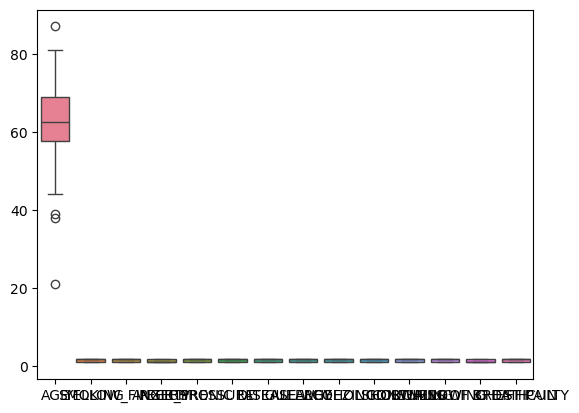

In [9]:
sns.boxplot(data = data)

In [10]:
q1 = data['AGE'].quantile(0.25)
q3 = data['AGE'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5*iqr
ub = q3 - 1.5*iqr

print(lb,ub)

40.875 52.125


In [11]:
data.loc[data['AGE']<lb, 'AGE'] = lb
# data.loc[data['AGE']>ub, 'AGE'] = ub

C:\Users\USER\AppData\Local\Temp\ipykernel_13632\126409384.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '40.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['AGE']<lb, 'AGE'] = lb


<Axes: >

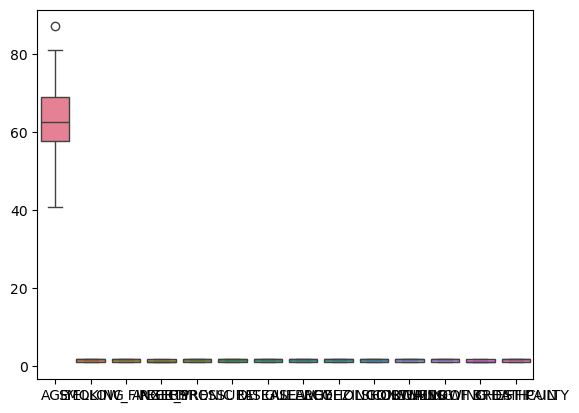

In [12]:
sns.boxplot(data = data)

In [13]:
data['AGE'].max()

87.0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 276 non-null    object 
 1   AGE                    276 non-null    float64
 2   SMOKING                276 non-null    int64  
 3   YELLOW_FINGERS         276 non-null    int64  
 4   ANXIETY                276 non-null    int64  
 5   PEER_PRESSURE          276 non-null    int64  
 6   CHRONIC DISEASE        276 non-null    int64  
 7   FATIGUE                276 non-null    int64  
 8   ALLERGY                276 non-null    int64  
 9   WHEEZING               276 non-null    int64  
 10  ALCOHOL CONSUMING      276 non-null    int64  
 11  COUGHING               276 non-null    int64  
 12  SHORTNESS OF BREATH    276 non-null    int64  
 13  SWALLOWING DIFFICULTY  276 non-null    int64  
 14  CHEST PAIN             276 non-null    int64  
 15  LUNG_CANCER

In [15]:
data.dtypes

GENDER                    object
AGE                      float64
SMOKING                    int64
YELLOW_FINGERS             int64
ANXIETY                    int64
PEER_PRESSURE              int64
CHRONIC DISEASE            int64
FATIGUE                    int64
ALLERGY                    int64
WHEEZING                   int64
ALCOHOL CONSUMING          int64
COUGHING                   int64
SHORTNESS OF BREATH        int64
SWALLOWING DIFFICULTY      int64
CHEST PAIN                 int64
LUNG_CANCER               object
dtype: object

In [16]:
df_cleaned = data.copy()
df_cleaned.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### This is a classification type of supervised machine Learning, LUNG_CANCER column is the Target.

In [17]:
df_cleaned['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64

In [18]:
df_cleaned['AGE'].mean()

62.99864130434783

In [19]:
df_cleaned.groupby('LUNG_CANCER')['GENDER'].value_counts()

LUNG_CANCER  GENDER
NO           F          21
             M          17
YES          M         125
             F         113
Name: count, dtype: int64

In [20]:
df_cleaned.groupby('GENDER')['AGE'].mean()

GENDER
F    63.192164
M    62.816021
Name: AGE, dtype: float64

In [21]:
df_cleaned.groupby('LUNG_CANCER')['AGE'].mean()

LUNG_CANCER
NO     61.207237
YES    63.284664
Name: AGE, dtype: float64

### Visualization of Features Analysis based on the Target ['LUNG_CANCER']

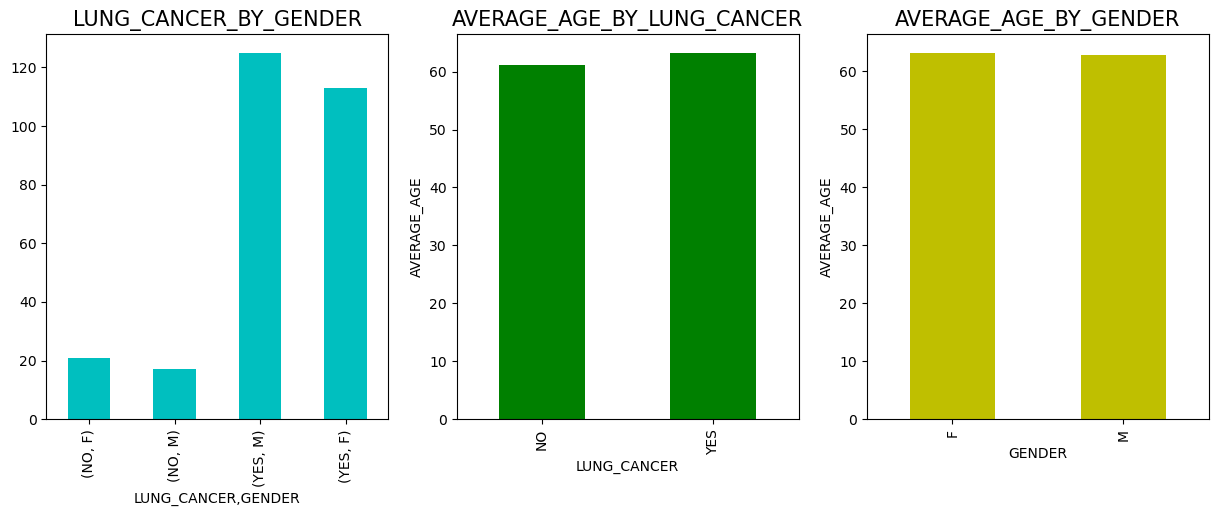

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
GEN =df_cleaned.groupby('LUNG_CANCER')['GENDER'].value_counts()
GEN.plot(kind = 'bar', color = 'c')
plt.title('LUNG_CANCER_BY_GENDER', fontsize = 15)

plt.subplot(1,3,2)
MAGE = df_cleaned.groupby('LUNG_CANCER')['AGE'].mean()
MAGE.plot(kind = 'bar', color = 'g')
plt.title('AVERAGE_AGE_BY_LUNG_CANCER', fontsize = 15)
plt.ylabel('AVERAGE_AGE', fontsize = 10)

plt.subplot(1,3,3)
MAGE = df_cleaned.groupby('GENDER')['AGE'].mean()
MAGE.plot(kind = 'bar', color = 'y')
plt.title('AVERAGE_AGE_BY_GENDER', fontsize = 15)
plt.ylabel('AVERAGE_AGE', fontsize = 10)
plt.savefig('LUNG_CANCER_BY_GENDER & AVERAGE_AGE_BY_LUNG_CANCER & AVERAGE_AGE_BY_GENDER.png')

plt.show()



### ANALYSIS
### From the  first plot (LUNG_CANCER_BY_GENDER), It reveals that the Gender(M) has more Lung cancer patients (145) than the Gender(F) patients (125).
### From the second plot (AVERAGE_AGE_BY_LUNG_CANCER), It shows the Average Age of patients that has Lung cancer. Approximately, the Average Age with Lung cancer is 63 while the Average Age without Lung cancer is 61.
### From the thirst plot (AVERAGE_AGE_BY_GENDER), This plot shows the Average Age by Gender. 

### This Analysis shows that, as the larger the Age, the more likely the patient has Lung cancer. And from this Dataset, The Gender (M) even with a slight Average Age difference, is more prone to having Lung cancer

### Preprocessing the Dataset for Precise Analysis

In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
Label = LabelEncoder()

In [24]:
string = data.select_dtypes(include='object').columns
for column in string:
    data[column] = Label.fit_transform(data[column].astype(object))

In [25]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [26]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,62.998641,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,0.862319
std,0.500698,8.048613,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,40.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


### For GENDER: 1 -> M, 0 -> F
### For LUNG_CANCER: 1 -> YES, 0 -> NO

In [27]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.023400,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
AGE,-0.023400,1.000000,-0.068852,0.016510,0.041659,0.029827,0.005368,0.030411,0.048770,0.047071,0.043593,0.165262,-0.001064,-0.007073,-0.045441,0.089097
SMOKING,0.041131,-0.068852,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,0.016510,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.041659,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,0.029827,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,0.005368,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,0.030411,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,0.048770,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,0.047071,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


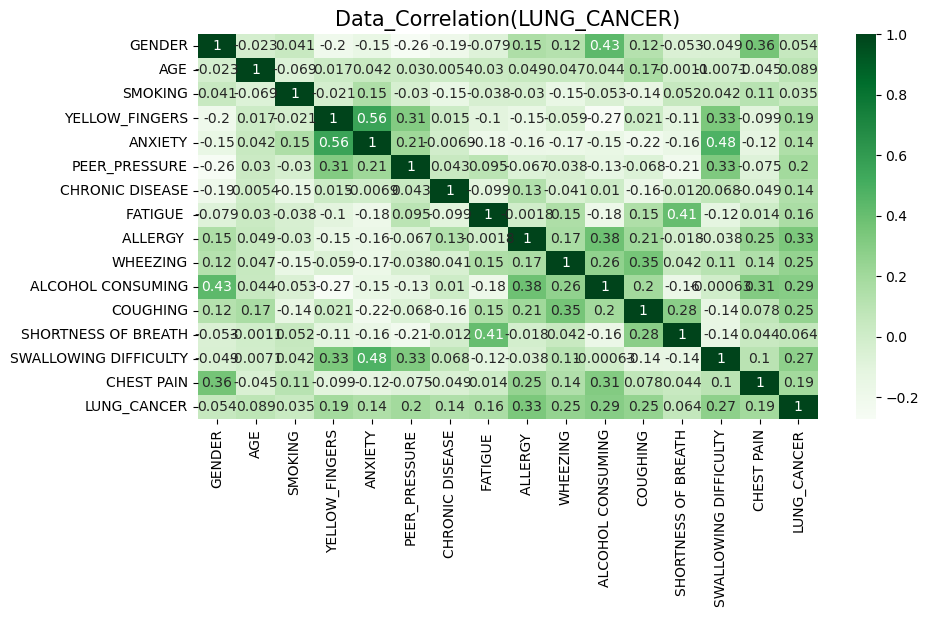

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(data = data.corr(), annot=True, cmap = 'Greens')
plt.title('Data_Correlation(LUNG_CANCER)', fontsize = 15)
plt.savefig('Data_Correlation(LUNG_CANCER).png')

In [29]:
data['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

In [30]:
df_encoded = data.copy()

### Splitting the Dataset

In [31]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Model Selection and Model Training

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [34]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(220, 15)
(220,)
(56, 15)
(56,)


(None, None)

### LogisticRegression Model

In [35]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [36]:
logr.fit(X_train,y_train)

C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = logr.predict(X_test)
print(y_pred)
print('\n')
print(len(y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


56


In [38]:
y_test_list = list(y_test)
print(y_test_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [39]:
Actual_vs_Predicted = {'Actual' : y_test_list, 'Predicted' : y_pred}

In [40]:
A_P = pd.DataFrame(Actual_vs_Predicted)
A_P.to_csv('Actual_vs_Predicted.csv', index=False)

### Visualization of Model Evaluation - Actual vs Predicted chart (LogisticRegression)

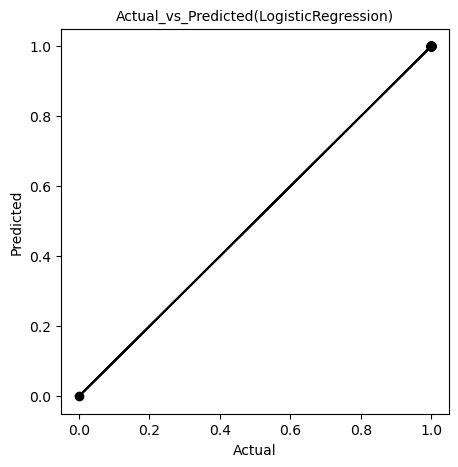

In [41]:
plt.figure(figsize=(5,5))
plt.plot(y_test_list,y_pred, color = 'k',marker = 'o')
plt.title('Actual_vs_Predicted(LogisticRegression)', fontsize = 10)
plt.xlabel('Actual', fontsize = 10)
plt.ylabel('Predicted', fontsize = 10)
plt.savefig('Actual_vs_Predicted(LogisticRegression).png')
plt.show()

### Model Evaluation

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        55

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [44]:
logr_Confused_matrix = confusion_matrix(y_test, y_pred)

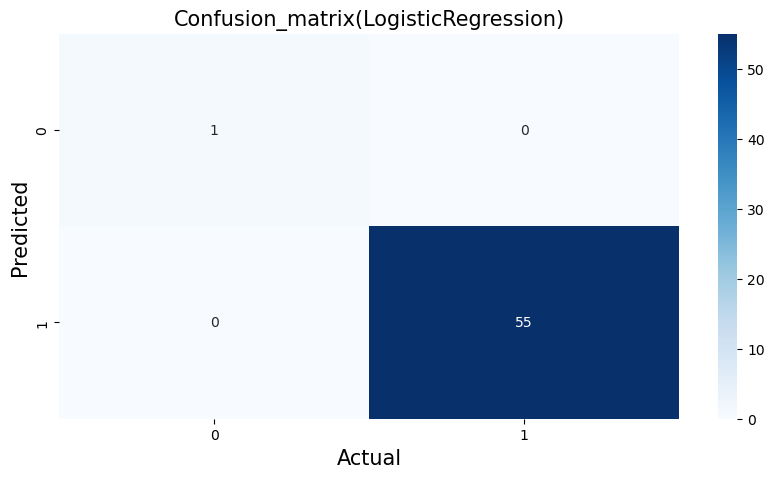

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(data = logr_Confused_matrix, annot=True, cmap = 'Blues')
plt.title('Confusion_matrix(LogisticRegression)', fontsize = 15)
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted', fontsize = 15)
plt.savefig('Confusion_matrix(LogisticRegression).png')
plt.show()

### From the classification report, the model has a f1 -score of 1.00 for both {0 and 1}. It also has a 100 percent prediction accuracy.
### The confusion_matrix plot shows the True positive(TP), True Negative(TN), False Positive (FP), False Negative (FN).
### The FP and FN are zero validating the 100 percent prediction accuracy by the model.
### The LogisticRegression model is perfectly predictive of the dataset.